# Optimizing Neural Network

In this notebook I look at optimization algorithms for my Neural Network on the traning/test set.

The network is with the options: Gradient descent (standard), Momentum or ADAM 

I aim at reaching as high accuracy as possible with as low variance as possible. This is ensured by obtaining a similar accuracy for the test and traning set. 

First, import relevant modules

<a name='1'></a>
## 1 - Packages

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from NeuralNetwork import NNW
from HelpFunctions import *
from DecayRates import * 

<a name='1'></a>
## 2 - Data
The data is simulated using sklearn.datasets.make_moons. It consists of 3000 samples to avoid heavy computations. The data is split into test/traning parts consisting of 20%/80% of the data. 

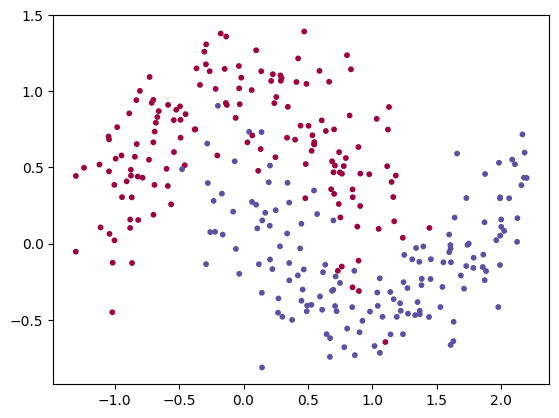

In [2]:
# Load data
X, Y = load_dataset()
# Convert into pandas frames
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
# Split data into training and test set (20% test with 600 obs)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X.T, Y.T, test_size = 0.2, random_state=1)

<a name='1'></a>
## 3 - Fit Network

In [3]:
# Define network architechture
# As the data is not too complex a shallow network should suffice.
layers_dims = [X.shape[0], 4, 1]
# Define network object
Network = NNW()

In [4]:
# Convert data back to arrays for function to work
X_Train = X_Train.T.to_numpy()
X_Test = X_Test.T.to_numpy()
Y_Train = Y_Train.T.to_numpy()
Y_Test = Y_Test.T.to_numpy()

<a name='1'></a>
### 3.1 - Gradient descent

In [5]:
# optimizer {gd, momentum, Adam}
# Decay_rate {}

parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                             Y = Y_Train, 
                                             layers_dims = layers_dims, 
                                             optimizer = "gd",
                                             learning_rate = 0.005,
                                             print_cost = True)


Cost after epoch 0: 0.721839
Cost after epoch 1000: 0.370596
Cost after epoch 2000: 0.335041
Cost after epoch 3000: 0.322473
Cost after epoch 4000: 0.314942


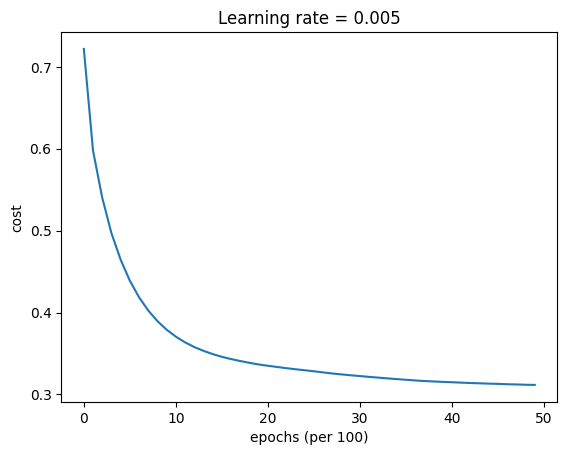

Accuracy: 86%


In [6]:
# Plot learning rate
Network.graph(cost, learningrate)
# Print accuracy 
predictions = Network.predict(parameters, X_Test)
print ('Accuracy: %d' % float((np.dot(Y_Test, predictions.T) + np.dot(1 - Y_Test, 1 - predictions.T)) / float(Y_Test.size) * 100) + '%')

<a name='1'></a>
### 3.2 - Momentum

The Momentum algorithm extends the gradient descent method by considering a weighted version of the gradients over multiple epochs, rather than the contemporaneous gradient.
Formally, we can write the momentum algorithm as follows:
$$v_{d\theta} = \beta v_{d\theta} + (1 - \beta) d\theta \\
  \theta = \theta - \alpha v_{d\theta}, $$
where $\theta$ is the parameter matrix, $d_{\theta}$ is the associated gradient and $\alpha$ is the learning rate. Compared to standard gradient descent, the gradient has been replaced by $v_{d\theta}$ in the above equation. This new varible is defined as the velocity of the gradient. It is derived from an exponentially moved weighted average based on the parameter $\beta$. A high value on $\beta$ implies that we value previous values of $v_{d\theta}$ relatively higher and for that reason the exponential weighting are based on relatively more epochs. 

In [7]:
parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                             Y = Y_Train, 
                                             layers_dims = layers_dims, 
                                             optimizer = "momentum",
                                             learning_rate = 0.005,
                                             beta = 0.9, 
                                             print_cost = True)

Cost after epoch 0: 0.722679
Cost after epoch 1000: 0.370882
Cost after epoch 2000: 0.335159
Cost after epoch 3000: 0.322583
Cost after epoch 4000: 0.314987


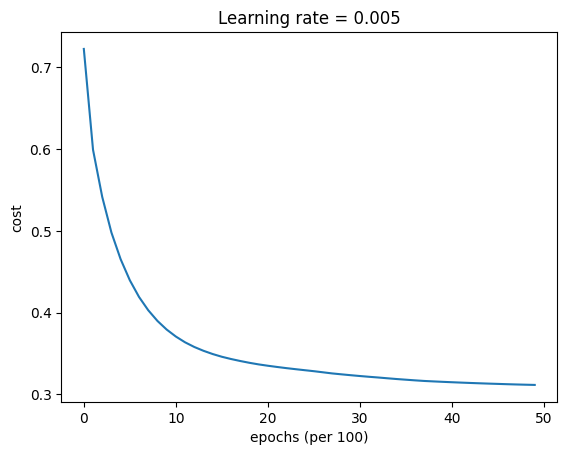

Accuracy: 86%


In [8]:
# Plot learning rate
Network.graph(cost, learningrate)
# Print accuracy 
predictions = Network.predict(parameters, X_Test)
print ('Accuracy: %d' % float((np.dot(Y_Test, predictions.T) + np.dot(1 - Y_Test, 1 - predictions.T)) / float(Y_Test.size) * 100) + '%')


The algorithm seems to perform worse than simple gradient descent. The graph indicates that gd with momentum is slower at convergence. It should be noted that changing the value of $\beta$ change this result and the same is true for a different learning rate, $\alpha$. I stick to $\alpha = 0.005$ for consistency. 

<a name='1'></a>
### 3.3 - Adaptive Moment Estimation (ADAM)

ADAM is a combination of Momentum and RMSprop. The algorithm goes as follows:
    $$ v_{d\theta} = \beta_1v_{d\theta} + (1 - \beta_1)d\theta \\
       s_{d\theta} = \beta_2s_{d\theta} + (1 - \beta_2)d\theta^2 \\
       V_{d\theta}^{corrected} = v_{d\theta} / (1 - \beta_1^t) \\
       S_{d\theta}^{corrected} = s_{d\theta} / (1 - \beta_2^t) \\
       \theta := \theta - \alpha \frac{V_{d\theta}^{corrected}}{\sqrt{S_{d\theta}^{corrected}}+\varepsilon}
$$
The intuition for $\beta_1, \beta_2$ is the same as for $\beta$ in the momentum algorithm. Also ADAM takes into account the second moment of the gradient by squarring the gradient in the derivations of $s$. 

In [9]:
parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                             Y = Y_Train, 
                                             layers_dims = layers_dims, 
                                             optimizer = "adam",
                                             learning_rate = 0.005,
                                             beta1 = 0.9,
                                             beta2 = 0.999,
                                             epsilon = 1e-8,
                                             print_cost = True)

Cost after epoch 0: 0.716051
Cost after epoch 1000: 0.136814
Cost after epoch 2000: 0.135107
Cost after epoch 3000: 0.135341
Cost after epoch 4000: 0.135107


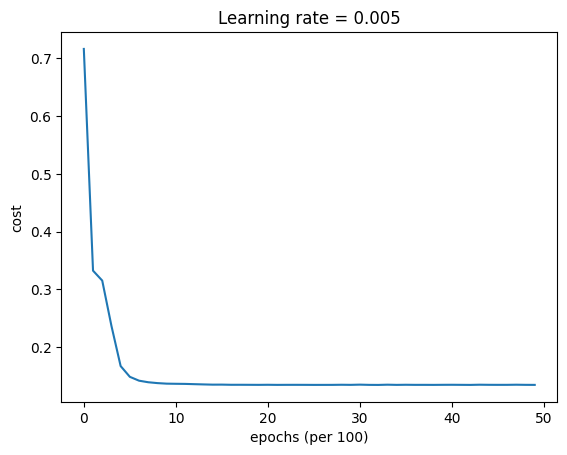

Accuracy: 95%


In [10]:
# Plot learning rate
Network.graph(cost, learningrate)
# Print accuracy 
predictions = Network.predict(parameters, X_Test)
print ('Accuracy: %d' % float((np.dot(Y_Test, predictions.T) + np.dot(1 - Y_Test, 1 - predictions.T)) / float(Y_Test.size) * 100) + '%')


<a name='1'></a>
## 4 - Decaying learning rates

Sometimes it makes sense to consider a learning rates that converge towards zero as the number of epochs increase. The network includes the default obtion to include a predefined function for decaying learning rates. In the below I consider a exponential weight decay with fixed intervals set to 1000: 
$$\alpha = \frac{1}{1 + decayRate \times \lfloor\frac{epochNum}{timeInterval}\rfloor} \alpha_{0}$$

In [11]:
# Define 3 layer network with ADAM and no decay rate
parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                             Y = Y_Train, 
                                             layers_dims = layers_dims, 
                                             optimizer = "gd",
                                             learning_rate = 0.005,
                                             print_cost = True,
                                             decay = schedule_lr_decay)

Cost after epoch 0: 0.721839
Cost after epoch 1000: 0.370596
Cost after epoch 2000: 0.370433
Cost after epoch 3000: 0.370433
Cost after epoch 4000: 0.370433


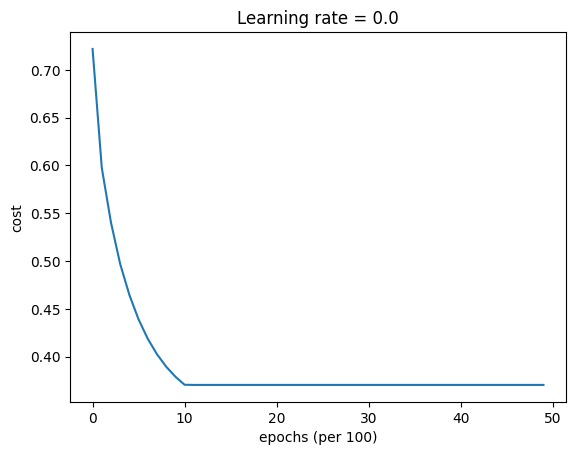

Accuracy: 86%


In [12]:
# Plot learning rate
Network.graph(cost, learningrate)
# Print accuracy 
predictions = Network.predict(parameters, X_Test)
print ('Accuracy: %d' % float((np.dot(Y_Test, predictions.T) + np.dot(1 - Y_Test, 1 - predictions.T)) / float(Y_Test.size) * 100) + '%')

Cost after epoch 0: 0.716051
Cost after epoch 1000: 0.136814
Cost after epoch 2000: 0.136482
Cost after epoch 3000: 0.136482
Cost after epoch 4000: 0.136482


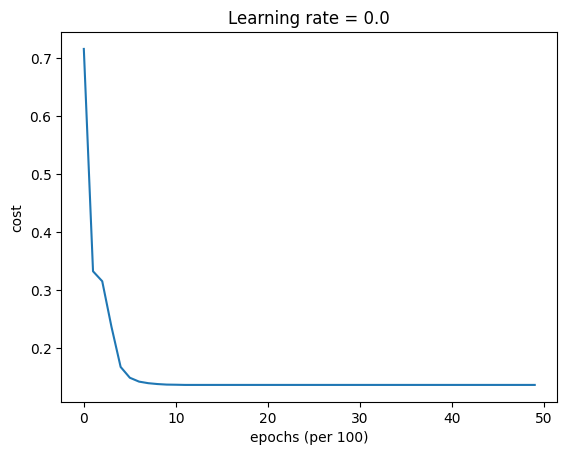

Accuracy: 95%


In [13]:
# Define 3 layer network with ADAM and no decay rate
parameters, cost, learningrate = Network.Fit(X = X_Train, 
                                             Y = Y_Train, 
                                             layers_dims = layers_dims, 
                                             optimizer = "adam",
                                             learning_rate = 0.005,
                                             print_cost = True,
                                             decay = schedule_lr_decay)

# Plot learning rate
Network.graph(cost, learningrate)
# Print accuracy 
predictions = Network.predict(parameters, X_Test)
print ('Accuracy: %d' % float((np.dot(Y_Test, predictions.T) + np.dot(1 - Y_Test, 1 - predictions.T)) / float(Y_Test.size) * 100) + '%')

Apparently the decaying learning rate doesn't change the outcome by any significant amount. 